In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## LSTM

Long short term memory, LSTM -  представляет собой систему глубинного обучения, при реализации которой удалось обойти проблему исчезновения или взрыва градиентов в процессе обучения методом обратного распространения ошибки. 

Сеть LSTM обычно модерируется с помощью рекуррентных вентилей, которые называются вентили (gates) «забывания».

Ошибки распространяются назад по времени через потенциально неограниченное количество виртуальных слоёв. 

Таким образом происходит обучение в LSTM, при этом сохраняя память о временных интервалах в прошлого



https://github.com/nicodjimenez/lstm

Визуализация работы LSTM http://datareview.info/article/issleduem-lstm-seti-chast-2/

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, GRU, SimpleRNN, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import numpy as np
from PIL import Image
import tensorflow as tf

In [ ]:
xLen=10 ## длина истории
n=5   ## длина вектора данных

In [ ]:
x = Input(shape = (xLen,n,))
y = LSTM(    32, return_sequences = True, )(x)
y1 = LSTM( 32,return_sequences = False)(y)


model = Model(x,y1)
model.compile(loss = 'mse',optimizer = 'Adam',metrics = ['mse'])

In [ ]:
y1

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm_1')>

In [ ]:
y

<KerasTensor: shape=(None, 10, 32) dtype=float32 (created by layer 'lstm')>

In [ ]:
x

<KerasTensor: shape=(None, 10, 5) dtype=float32 (created by layer 'input_1')>

In [ ]:
xx = np.random.randn(1,xLen,n)

y.shape,xx.shape 


(TensorShape([None, 10, 32]), (1, 10, 5))

In [ ]:
yy = model.predict(xx)

In [ ]:
yy.shape

(1, 32)

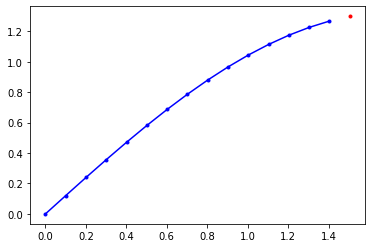

((284, 1), (284, 15, 2))

In [ ]:
N = 300
t = np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.2
n = 2
xLen = 15


plt.plot(t[0:xLen],x[0:xLen],'.-b')


h = 1  # горизонт прогноза
xx = []
y = []
for i in range(N-xLen - h):
  xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
  y.append(x[i+h+xLen-1])
xx = np.array(xx)  
y = np.array(y)

plt.plot(t[xLen+h-1],y[0],'.r')
plt.show()
y.shape,xx.shape 

In [ ]:
x_in = Input(shape = (xLen,n,))
y_out = LSTM(64,return_sequences = False)(x_in)
y_out = Dense(1,activation = 'linear')(y_out)


model = Model(x_in,y_out)
model.compile(loss = 'mse',optimizer = 'Adam',metrics = ['mse'])

In [ ]:
x_in

<KerasTensor: shape=(None, 15, 2) dtype=float32 (created by layer 'input_2')>

In [ ]:
test_n = 200
model.fit(xx[:test_n,:,:],y[:test_n], epochs = 20)

Epoch 1/20
7/7 [==============================] - 5s 7ms/step - loss: 5.9034 - mse: 5.9034
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 1.8502 - mse: 1.8502
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 1.2455 - mse: 1.2455
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7176 - mse: 0.7176
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4685 - mse: 0.4685
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3481 - mse: 0.3481
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2580 - mse: 0.2580
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2264 - mse: 0.2264
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2050 - mse: 0.2050
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1872 - mse: 0.1872
Epoch 11/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1739 - mse: 0.17

In [ ]:
ypred = model.predict(xx[test_n:,:,:])


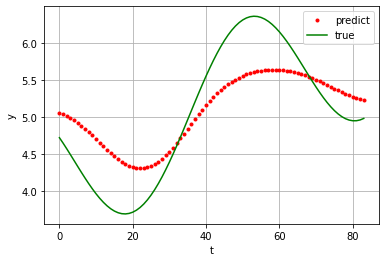

In [ ]:
plt.plot(ypred,'.r', label = 'predict')
plt.plot(y[test_n:],'g', label = 'true')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
yy

array([[[-3.79546620e-02, -9.58049372e-02, -1.61804538e-02,
          1.25211090e-01, -3.80744934e-02, -7.29169473e-02,
         -3.48699093e-02, -1.30776554e-01,  1.45580336e-01,
         -3.14375199e-02,  8.41212943e-02, -1.54122561e-02,
         -1.35296732e-01,  4.46918234e-02,  1.22015297e-01,
         -1.11163668e-02,  6.91670999e-02,  7.46657103e-02,
          6.13197684e-02, -6.37085661e-02, -1.42072781e-03,
         -6.36840537e-02,  2.53512226e-02,  8.26883987e-02,
         -3.42666134e-02, -7.82267377e-02,  2.10471600e-02,
         -3.38145830e-02, -8.12876448e-02,  9.75956842e-02,
          9.44698006e-02, -1.22838184e-01],
        [-3.57982740e-02, -5.24647646e-02, -7.47956289e-03,
          6.11059964e-02, -6.11946806e-02,  7.08255768e-02,
         -1.12720340e-01, -1.46334961e-01,  9.01646763e-02,
         -3.61206867e-02,  1.81913450e-01, -1.56502977e-01,
         -3.70675139e-02, -1.63722027e-03,  7.64371380e-02,
         -3.67433168e-02,  6.70852885e-02,  1.44032672e-